# (A)	COLLECT / EXTRACT DATA
THE FIRST STEP IN BUILDING A MODEL IS TO COLLECT OR EXTRACT DATA ON THE DEPENDENT VARIABLE AND INDEPENDENT VARIABLES FROM DIFFERENT DATASETS PROVIDED. DATA COLLECTION / EXTRACTION IS TIME CONSUMING AND EXPENSIVE PROCESS.
•	YOU AS TEAM OF THREE OR FOUR STUDENTS YOU HAVE MERGE THE CANDIDATE DATA PROVIDED BASED ON THE COMMON FACTORS. 
•	SIMULTANESUOYLY YOU NEED TO MAKE SEARCH WHAT ARE THE ATTRIBUTES THOSE ARE TAKEN INTO CONSIDERATION WHILE CARRYING OUT RECRUITMENT ACTIVITY. 
•	THE RESEARCH WILL PROVIDE YOU MORE INSIGHT ON DETERMINING THE USEFUL ATTRIBUTES PRESENT IN THE DATASET OR GIVE POINTERS TO THE VARIBLES THAT NEEDS TO BE DERVIED. MAKE LIST OF SUCH POTENTIAL ATTRIBTUES. 
•	OUTCOME OF THIS STEP WILL BE MERGED DATA SET CONTAINING THE 200 CANDIDATES DATA. 
•	DOCUMENT ALL YOUR EFFORTS APPROPRIATELY IN THE JUPYTER NOTEBOOKS WITH DESCRIPTION AND CODE. 
•	THE WEIGTAGE FOR THIS TASK WILL BE 5 MARKS





# Solution:-



### Import required libraries

In [1]:
#Impor libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# to split and standarize the datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# to evaluate Classification models
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import SGDRegressor, SGDClassifier,LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error  #calculate error between predicted values and test values
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from mlxtend.feature_selection import SequentialFeatureSelector as sfs      #Forward and Backward feature selection
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest


### Import and  Merge the data set

In [2]:
# Read data from the 3 relevant data sheets given in the original data set HR-Records_Final
# All three of them have the unique column Candidate ID in common. 
# We used this common factor to merge the three data sheets using Outer Join
# This can be done using the merge method in pandas

Applicationdata = pd.read_excel('HR-Records_Final.xlsx', sheet_name = 'Application data')
Candidatedata = pd.read_excel('HR-Records_Final.xlsx', sheet_name = 'Candidate Data')
Interviewdata = pd.read_excel('HR-Records_Final.xlsx', sheet_name = 'Interview Data ')
df_merge1 = pd.merge(Applicationdata, Candidatedata, on="Candidate ID", how="outer")
df_merge= pd.merge(df_merge1, Interviewdata, on="Candidate ID", how="outer")
df_merge# Now df_merge is having raw merged data from Excel sheet

,Candidate ID,Date of Application,Date of Interview,Date of Job Offer,Date of Offer extension,Date of Joining,Offered band,Offered Salary,Percentage hike offered (CTC),Joining bonus amount,...,Location,Number of precious jobs,Written Test Date,Interview rounds,Date of first Interview,Date of last Interview,Interview types,Interview Types2,First interview duration,Last interaction duration
0,C1,2019-08-28,2020-06-12,2020-06-22,2020-06-29,2020-07-14,B2,1.383755e+06,0.190383,58122.28125,...,Kolkata,2,2020-05-29,4,2020-06-03,2020-06-12,General,Online,40,25
1,C2,2019-11-28,2020-06-08,2020-06-18,2020-06-25,2020-07-10,B4,2.976590e+06,0.332342,111705.13125,...,Pune,4,2020-05-31,2,2020-06-05,2020-06-08,Managerial,FaceToFace,40,40
2,C3,2019-08-11,2020-05-26,2020-06-05,2020-06-12,2020-07-12,B0,7.416631e+05,0.271345,29168.43750,...,Chennai,1,2020-05-15,3,2020-05-20,2020-05-26,Technical,Online,45,60
3,C4,2019-08-18,2020-05-15,2020-05-25,2020-06-01,2020-07-31,C6,4.079724e+06,0.273813,160138.23750,...,Hyderabad,6,2020-05-10,1,2020-05-15,2020-05-15,Technical,Written,40,40
4,C5,2019-09-06,2020-01-25,2020-02-04,2020-02-11,2020-02-26,B5,3.340936e+06,0.289619,129531.88125,...,Hyderabad,5,2020-01-11,4,2020-01-16,2020-01-25,Technical,Online,15,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,C196,2019-12-06,2020-06-08,2020-06-18,2020-06-25,2020-08-09,B5,3.632560e+06,0.358273,133719.80625,...,Bangaluru,5,2020-05-25,4,2020-05-30,2020-06-08,Technical,FaceToFace,15,20
196,C197,2019-11-10,2020-06-24,2020-07-04,2020-07-11,2020-08-25,B5,2.951355e+06,0.186976,124322.40000,...,Kolkata,5,2020-06-13,3,2020-06-18,2020-06-24,General,Written,60,60
197,C198,2019-11-19,2020-01-31,2020-02-10,2020-02-17,2020-03-03,B4,2.392678e+06,0.154088,103660.98750,...,Kolkata,4,2020-01-17,4,2020-01-22,2020-01-31,Technical,FaceToFace,30,15
198,C199,2019-09-12,2020-05-02,2020-05-12,2020-05-19,2020-07-18,B4,2.803924e+06,0.430020,98037.95625,...,Kolkata,4,2020-04-18,4,2020-04-23,2020-05-02,Managerial,FaceToFace,25,25


### Analyse the Dataset

In [3]:
df_merge.dtypes

Candidate ID                               object
Date of Application                datetime64[ns]
Date of Interview                  datetime64[ns]
Date of Job Offer                  datetime64[ns]
Date of Offer extension            datetime64[ns]
Date of Joining                    datetime64[ns]
Offered band                               object
Offered Salary                            float64
Percentage hike offered (CTC)             float64
Joining bonus amount                      float64
LOB                                        object
Joining location                           object
Candidate relocation status                object
Acceptance status                          object
Notice period                               int64
Current CTC                               float64
Current gross salary                        int64
Current organization                       object
Highest Educational Degree                 object
Total experience                            int64


#### Statistical Summary

In [4]:
# lets look at the statistical summary of the numerical data
df_merge.describe()

,Offered Salary,Percentage hike offered (CTC),Joining bonus amount,Notice period,Current CTC,Current gross salary,Total experience,Relevant experience,Year of graduation,Expected CTC,Percentage hike (CTC) expected,Number of precious jobs,Interview rounds,First interview duration,Last interaction duration
count,2.000000e+02,200.000000,200.000000,200.000000,2.000000e+02,2.000000e+02,200.000000,200.000000,200.000000,2.000000e+02,200.000000,200.000000,200.000000,200.000000,200.0000
mean,2.346565e+06,0.270672,92967.280031,31.275000,1.859346e+06,1.652752e+06,12.280000,11.052000,2007.720000,2.532500e+06,0.370672,3.575000,2.485000,35.700000,35.1250
std,1.095181e+06,0.087131,43718.606470,22.038098,8.743721e+05,7.772197e+05,5.242041,4.717837,5.242041,1.181556e+06,0.087131,1.728965,1.125214,14.397794,14.7631
min,4.609491e+05,0.109940,18048.881250,0.000000,3.609776e+05,3.208690e+05,3.000000,2.700000,2000.000000,5.000000e+05,0.209940,1.000000,1.000000,15.000000,15.0000
25%,1.396196e+06,0.194058,52955.339063,15.000000,1.059107e+06,9.414282e+05,7.750000,6.975000,2003.000000,1.500000e+06,0.294058,2.000000,1.000000,25.000000,25.0000
50%,2.414243e+06,0.275515,96949.490625,30.000000,1.938990e+06,1.723546e+06,12.000000,10.800000,2008.000000,2.600000e+06,0.375515,4.000000,3.000000,40.000000,30.0000
75%,3.317921e+06,0.340090,133375.598438,45.000000,2.667512e+06,2.371122e+06,17.000000,15.300000,2012.250000,3.600000e+06,0.440090,5.000000,3.000000,45.000000,45.0000
max,4.568679e+06,0.491772,167622.243750,60.000000,3.352445e+06,2.979951e+06,20.000000,18.000000,2017.000000,4.900000e+06,0.591772,6.000000,4.000000,60.000000,60.0000


# Inference of Analysis after Merging the Raw Data

After merging the data there are 200 records and 37 variables in total.

On analysing the merged data based on domain knowledge we find the folowing:- 

The first column is the Candidate ID which is mainly <b>useful for us only to merge the datasets.</b> We will not be needing this further.


We have 9 datetime(Timeseries) data in our dataset. These columns, may not help us directly in giving us insights but we may be able to
derive some useful features using combinations of some of these.

Though, it is mentioned in dictionary that "Current CTC" of Candidate ranges between <b>Rs 3L to 30L</b>, in dataset we have 19 values that are out of range.

At a cursory look, some of the important columns that might be taken into consideration while carrying out the recruitment activity could be :-


Offeredband<br>OfferedSalary<br>Percentagehikeoffered(CTC)<br>Joiningbonusamount<br>LOB<br>Joininglocation<br>Candidaterelocationstatus<br>Noticeperiod<br>CurrentCTC<br>Currentgrosssalary<br>Currentorganization<br>HighestEducationalDegree<br>Totalexperience<br>Relevantexperience<br>Yearofgraduation<br>ExpectedCTC<br>Percentagehike(CTC)expected<br>Gender<br>Candidatesource<br>Location.


But we shall go through some vizualization and feature selection algorithms before we decide to drop any columns. 

Year of graduation minus year of data collection should be equal to the total years of exp otherwise the career has a gap. We can derive this feature. Based on the sum of total experience and year of graduation for most of the records, we assume that the data is collected in the year 2020.

We can derive the difference in Percentage Hike (CTC) between offered and expected as an attribute as this may be an important
deciding fator for the candidate.

Derived Financial Quarter from date of application by Candidate

<b>Derive features:-</b><br>
Offer_Released_Joining_Date_Gap<br>
Days_In_Getting_Offer_Letter<br>
Days_Extending_Offer_Letter<br>
Offered_Expected_Hike_Gap<br>
Age<br>
Career_Gap<br>
Quarter_Application_Submitted<br>



In [5]:
#Days Gap In Offer Released And Joining Date
df_merge['Offer_Released_Joining_Date_Gap'] = (df_merge['Date of Joining'] - df_merge['Date of Job Offer']).dt.days

#Days in getting Offer letter after all interviews over
df_merge['Days_In_Getting_Offer_Letter'] = (df_merge['Date of Job Offer'] - df_merge['Date of last Interview']).dt.days

#Days in Job Offer Extension
df_merge['Days_Extending_Offer_Letter'] = (df_merge['Date of Offer extension'] - df_merge['Date of Job Offer']).dt.days

#Improvement in Percentage Hike (CTC) i.e difference between offered and expected  Percentage Hike (CTC)

df_merge['Offered_Expected_Hike_Gap'] = (df_merge['Percentage hike (CTC) expected '] - df_merge['Percentage hike offered (CTC)'])*100

#Extracting Year from DOB and then subracting Year of data collection to get the Age of candidate

CandidateBirthYear = df_merge['DOB'].dt.year
df_merge['Today'] = pd.to_datetime ('today')

# Assuming Year_of_Data_Collection as 2020
Year_of_Data_Collection = df_merge['Today'].dt.year - 1

df_merge['Age']=Year_of_Data_Collection-CandidateBirthYear

# Deriving Career Gap
df_merge['Career_Gap'] = (Year_of_Data_Collection - df_merge['Year of graduation']) - df_merge['Total experience']

#Converting Date of Application submitted by Candidatein to the Financial Quarter
df_merge['Quarter_Application_Submitted'] = df_merge['Date of Application'].dt.quarter

# Dropping Todays date as it was created only for deriving Age
df_merge=df_merge.drop(['Today'], axis = 1) 


In [6]:
df_merge.head(5)

,Candidate ID,Date of Application,Date of Interview,Date of Job Offer,Date of Offer extension,Date of Joining,Offered band,Offered Salary,Percentage hike offered (CTC),Joining bonus amount,...,Interview Types2,First interview duration,Last interaction duration,Offer_Released_Joining_Date_Gap,Days_In_Getting_Offer_Letter,Days_Extending_Offer_Letter,Offered_Expected_Hike_Gap,Age,Career_Gap,Quarter_Application_Submitted
0,C1,2019-08-28,2020-06-12,2020-06-22,2020-06-29,2020-07-14,B2,1.383755e+06,0.190383,58122.28125,...,Online,40,25,22,10,7,10.0,29,0,3
1,C2,2019-11-28,2020-06-08,2020-06-18,2020-06-25,2020-07-10,B4,2.976590e+06,0.332342,111705.13125,...,FaceToFace,40,40,22,10,7,10.0,36,0,4
2,C3,2019-08-11,2020-05-26,2020-06-05,2020-06-12,2020-07-12,B0,7.416631e+05,0.271345,29168.43750,...,Online,45,60,37,10,7,10.0,25,0,3
3,C4,2019-08-18,2020-05-15,2020-05-25,2020-06-01,2020-07-31,C6,4.079724e+06,0.273813,160138.23750,...,Written,40,40,67,10,7,10.0,41,0,3
4,C5,2019-09-06,2020-01-25,2020-02-04,2020-02-11,2020-02-26,B5,3.340936e+06,0.289619,129531.88125,...,Online,15,25,22,10,7,10.0,38,0,3


In [7]:
df_merge=df_merge.drop(['Date of Interview'], axis = 1) 
df_merge=df_merge.drop(['Date of Job Offer','Date of Offer extension','Date of Application','Date of Joining','DOB','Written Test Date','Date of first Interview','Date of last Interview'], axis = 1) 


<b>Dropped Date ['Date of Interview']</b> <br>
Date of last Interview and Date of Interview columns contain the same values. Having both of them is redundant so we will drop the column last Interview.


<b>Dropped the following date time features as the relevant features were dervived out of it:-</b><br>
Date of Job Offer<br>
Date of Offer extension<br>
Date of Application<br>
Date of Joining<br>
DOB<br>
Written Test Date<br>
Date of first Interview<br>
Date of last Interview<br>

# (B)	PRE-PROCESS DATA
BEAFORE THE MODEL IS BUILT, IT IS ESSENTIAL TO ENSURE THE QUALITY OF THE DATA FOR ISSUES SUCH AS RELIABILITY, COMPLETENESS, USEFULLNESS, ACCURACY, MISSING DATA AND OUTLIERS. 
DATA IMPUTATION TECHNIQUES MAY BE USED TO DEAL WITH MISSING DATA. USE OF DESCRIPTIVE STAT AND VISUZLAIZATION MAY BE USED TO IDENTIFY THE EXISTENCE OF OUTLIERS AND VARIABILITY IN THE DATASET. MANY NEW VARIABLES CAN BE DERIVED AND ALOS USED IN MODEL BUILDING. CATEGORICAL DATA HAS TO BE PRE-PROCESSED USING DUMMY VARIABELS, BEFORE IT IS USED TO MODEL BUILDING. 
•	YOU HAVE TO CLEANSE YOUR DATASETS TO REMOVE ALL SUCH DAUNTING ISSSUES. 
•	NARRATE ALL THE ISSUES WHICH YOU ENCOUNTER DURING THIS EXERCISE CLEARLY WITH APPROPRIATE EXPLANATION AND CODE. 
•	THE WEIGTAGE FOR THIS TASK WILL BE 7 MARKS.

# Solution:-

In [8]:
# Encoding the Ordinal column Offered band

df_merge['Offered band']=df_merge['Offered band'].replace(to_replace="B0",value=1)
df_merge['Offered band']=df_merge['Offered band'].replace(to_replace="B1",value=2)
df_merge['Offered band']=df_merge['Offered band'].replace(to_replace="B2",value=3)
df_merge['Offered band']=df_merge['Offered band'].replace(to_replace="B3",value=4)
df_merge['Offered band']=df_merge['Offered band'].replace(to_replace="B4",value=5)
df_merge['Offered band']=df_merge['Offered band'].replace(to_replace="B5",value=6)
df_merge['Offered band']=df_merge['Offered band'].replace(to_replace="C6",value=7)
df_merge['Offered band']

0      3
1      5
2      1
3      7
4      6
      ..
195    6
196    6
197    5
198    5
199    1
Name: Offered band, Length: 200, dtype: int64

In [9]:
# Encoding Candidate relocation status "Yes" with "0" and ## Encoding Candidate relocation status "No" with 1
# Encoding Acceptance status ""Joined"" with "0" and ## Encoding Candidate relocation status "Offer Rejected" with 1
# Encoding Gender "Male" with "0" and ## Encoding Gender  "Female" with 1

df_merge['Candidate relocation status']=df_merge['Candidate relocation status'].replace(to_replace="Yes",value=0)
df_merge['Candidate relocation status']=df_merge['Candidate relocation status'].replace(to_replace="No",value=1)
df_merge['Acceptance status']=df_merge['Acceptance status'].replace(to_replace="Joined",value=0)
df_merge['Acceptance status']=df_merge['Acceptance status'].replace(to_replace="Offer Rejected",value=1)
df_merge['Gender']=df_merge['Gender'].replace(to_replace="M",value=0)
df_merge['Gender']=df_merge['Gender'].replace(to_replace="F",value=1)

df_merge['Highest Educational Degree']=df_merge['Highest Educational Degree'].replace(to_replace="Master",value=1)
df_merge['Highest Educational Degree']=df_merge['Highest Educational Degree'].replace(to_replace="Bachelors",value=2)
df_merge['Highest Educational Degree']=df_merge['Highest Educational Degree'].replace(to_replace="Diploma",value=3)


In [10]:
df_merge['Acceptance status'].head()

0    0
1    1
2    0
3    1
4    0
Name: Acceptance status, dtype: int64

In [11]:
# Install Command
# !pip install altair vega_datasets
df_merge

,Candidate ID,Offered band,Offered Salary,Percentage hike offered (CTC),Joining bonus amount,LOB,Joining location,Candidate relocation status,Acceptance status,Notice period,...,Interview Types2,First interview duration,Last interaction duration,Offer_Released_Joining_Date_Gap,Days_In_Getting_Offer_Letter,Days_Extending_Offer_Letter,Offered_Expected_Hike_Gap,Age,Career_Gap,Quarter_Application_Submitted
0,C1,3,1.383755e+06,0.190383,58122.28125,IT,NCR,0,0,0,...,Online,40,25,22,10,7,10.0,29,0,3
1,C2,5,2.976590e+06,0.332342,111705.13125,Manufacturing,NCR,0,1,0,...,FaceToFace,40,40,22,10,7,10.0,36,0,4
2,C3,1,7.416631e+05,0.271345,29168.43750,IT,Chennai,1,0,30,...,Online,45,60,37,10,7,10.0,25,0,3
3,C4,7,4.079724e+06,0.273813,160138.23750,Finance,Hyderabad,1,1,60,...,Written,40,40,67,10,7,10.0,41,0,3
4,C5,6,3.340936e+06,0.289619,129531.88125,IT,Mumbai,0,0,15,...,Online,15,25,22,10,7,10.0,38,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,C196,6,3.632560e+06,0.358273,133719.80625,IT,Chennai,0,0,45,...,FaceToFace,15,20,52,10,7,10.0,41,0,4
196,C197,6,2.951355e+06,0.186976,124322.40000,Finance,NCR,0,1,45,...,Written,60,60,52,10,7,10.0,38,0,4
197,C198,5,2.392678e+06,0.154088,103660.98750,IT,Hyderabad,0,1,0,...,FaceToFace,30,15,22,10,7,10.0,35,0,4
198,C199,5,2.803924e+06,0.430020,98037.95625,Finance,Pune,0,0,60,...,FaceToFace,25,25,67,10,7,10.0,34,0,3


In [12]:
# Determining the diff between expected and offered percentage
df_merge['Hikeaboveexpectation'] = (df_merge['Percentage hike (CTC) expected '] - df_merge['Percentage hike offered (CTC)'])

with pd.option_context('display.float_format', '{:0.6f}'.format):
    print(df_merge['Hikeaboveexpectation'].head)

<bound method NDFrame.head of 0     0.100000
1     0.100000
2     0.100000
3     0.100000
4     0.100000
        ...   
195   0.100000
196   0.100000
197   0.100000
198   0.100000
199   0.100000
Name: Hikeaboveexpectation, Length: 200, dtype: float64>


In [13]:
# dropping this coulmn as ths value is constant and will not help in Prediction
df_merge=df_merge.drop(['Hikeaboveexpectation'], axis = 1)
# df_merge=df_merge.drop(['Percentage hike (CTC) expected '], axis = 1)
# df_merge=df_merge.drop(['Percentage hike offered (CTC)'], axis = 1)

In [14]:
df_merge.columns

Index(['Candidate ID', 'Offered band', 'Offered Salary',
       'Percentage hike offered (CTC)', 'Joining bonus amount', 'LOB',
       'Joining location', 'Candidate relocation status', 'Acceptance status',
       'Notice period', 'Current CTC', 'Current gross salary',
       'Current organization', 'Highest Educational Degree',
       'Total experience', 'Relevant experience', 'Year of graduation',
       'Expected CTC', 'Percentage hike (CTC) expected ', 'Gender',
       'Candidate source', 'Location', 'Number of precious jobs',
       'Interview rounds', 'Interview types', 'Interview Types2',
       'First interview duration', 'Last interaction duration',
       'Offer_Released_Joining_Date_Gap', 'Days_In_Getting_Offer_Letter',
       'Days_Extending_Offer_Letter', 'Offered_Expected_Hike_Gap', 'Age',
       'Career_Gap', 'Quarter_Application_Submitted'],
      dtype='object')

In [15]:
# Dropping derived attributes as it has constant value

# DelayInGettingOfferLetter	Days_ExtendingOfferLetter	Days_GapBetweenWrittendandFirstInterview
df_merge=df_merge.drop(['Days_In_Getting_Offer_Letter','Days_Extending_Offer_Letter','Offered_Expected_Hike_Gap','Career_Gap'], axis = 1)



In [16]:
# Creating dummies for Catagorical data
data_set_withdummies = pd.get_dummies(df_merge, columns =["LOB","Joining location","Current organization","Candidate source","Location","Interview types","Interview Types2"])
print("Catagorical Features after get_dummies:\n", list(data_set_withdummies.columns))
print(data_set_withdummies.head())

#"Highest Educational Degree" need to ordinal

Catagorical Features after get_dummies:
 ['Candidate ID', 'Offered band', 'Offered Salary', 'Percentage hike offered (CTC)', 'Joining bonus amount', 'Candidate relocation status', 'Acceptance status', 'Notice period', 'Current CTC', 'Current gross salary', 'Highest Educational Degree', 'Total experience', 'Relevant experience', 'Year of graduation', 'Expected CTC', 'Percentage hike (CTC) expected ', 'Gender', 'Number of precious jobs', 'Interview rounds', 'First interview duration', 'Last interaction duration', 'Offer_Released_Joining_Date_Gap', 'Age', 'Quarter_Application_Submitted', 'LOB_Finance', 'LOB_IT', 'LOB_Manufacturing', 'Joining location_Chennai', 'Joining location_Hyderabad', 'Joining location_Mumbai', 'Joining location_NCR', 'Joining location_Pune', 'Current organization_Accenture', 'Current organization_Bajaj Finance', 'Current organization_Bank Of America', 'Current organization_CSE', 'Current organization_Cognizant', 'Current organization_HCL', 'Current organization_HSBC

In [17]:
# dropping Candidate ID
data_set_withdummies = data_set_withdummies.drop(["Candidate ID"], axis = 1) 

In [18]:
data_set_withdummies.to_excel("data_set_withoutNormalization.xlsx", index = False) 

In [19]:
#saving data in another dataframe too
data_set_mean = data_set_withdummies.copy()
data_set_mean.head(5)

,Offered band,Offered Salary,Percentage hike offered (CTC),Joining bonus amount,Candidate relocation status,Acceptance status,Notice period,Current CTC,Current gross salary,Highest Educational Degree,...,Location_Mumbai,Location_Mysore,Location_Noida,Location_Pune,Interview types_General,Interview types_Managerial,Interview types_Technical,Interview Types2_FaceToFace,Interview Types2_Online,Interview Types2_Written
0,3,1.383755e+06,0.190383,58122.28125,0,0,0,1162445.625,1033285,3,...,0,0,0,0,1,0,0,0,1,0
1,5,2.976590e+06,0.332342,111705.13125,0,1,0,2234102.625,1985869,3,...,0,0,0,1,0,1,0,1,0,0
2,1,7.416631e+05,0.271345,29168.43750,1,0,30,583368.750,518550,3,...,0,0,0,0,0,0,1,0,1,0
3,7,4.079724e+06,0.273813,160138.23750,1,1,60,3202764.750,2846902,3,...,0,0,0,0,0,0,1,0,0,1
4,6,3.340936e+06,0.289619,129531.88125,0,0,15,2590637.625,2302789,3,...,0,0,0,0,0,0,1,0,1,0


### Normalize the required columns using min max

In [20]:
  
# Loop through the list of column names to be normalized
# Derive the normalized value for each column by taking (val - min_of_val)/(max_of_val - min_of_val) 
# Store in a column named Normalized val (where val is the column name)
i=1

for i in ["Offered Salary","Joining bonus amount","Current CTC","Current gross salary","Expected CTC"]:
    data_set_withdummies['Normalized '+ i]=(data_set_withdummies[i]-data_set_withdummies[i].min())/(data_set_withdummies[i].max()-data_set_withdummies[i].min())
#     data_set_mean['Normalized '+ i] = (data_set_mean[i]-data_set_mean[i].mean())/(data_set_mean[i].std())

In [21]:
data_set_withdummies.head
# data_set_mean.head

<bound method NDFrame.head of      Offered band  Offered Salary  Percentage hike offered (CTC)  \
0               3    1.383755e+06                       0.190383   
1               5    2.976590e+06                       0.332342   
2               1    7.416631e+05                       0.271345   
3               7    4.079724e+06                       0.273813   
4               6    3.340936e+06                       0.289619   
..            ...             ...                            ...   
195             6    3.632560e+06                       0.358273   
196             6    2.951355e+06                       0.186976   
197             5    2.392678e+06                       0.154088   
198             5    2.803924e+06                       0.430020   
199             1    7.401562e+05                       0.236813   

     Joining bonus amount  Candidate relocation status  Acceptance status  \
0             58122.28125                            0                  0   

In [22]:
# Drop the non normalized columns after Min Max scaling
data_set_withdummies = data_set_withdummies.drop(["Offered Salary","Joining bonus amount","Current CTC","Current gross salary","Expected CTC"], axis = 1) 
# data_set_mean = data_set_mean.drop(["Offered Salary","Joining bonus amount","Current CTC","Current gross salary","Expected CTC"], axis = 1) 


In [23]:
#Relocating target Variable at last position
Target_Rejection_Status = data_set_withdummies['Acceptance status']
data_set_withdummies



,Offered band,Percentage hike offered (CTC),Candidate relocation status,Acceptance status,Notice period,Highest Educational Degree,Total experience,Relevant experience,Year of graduation,Percentage hike (CTC) expected,...,Interview types_Managerial,Interview types_Technical,Interview Types2_FaceToFace,Interview Types2_Online,Interview Types2_Written,Normalized Offered Salary,Normalized Joining bonus amount,Normalized Current CTC,Normalized Current gross salary,Normalized Expected CTC
0,3,0.190383,0,0,0,3,8,7.2,2012,0.290383,...,0,0,0,1,0,0.224651,0.267918,0.267918,0.267918,0.227273
1,5,0.332342,0,1,0,3,15,13.5,2005,0.432342,...,1,0,1,0,0,0.612416,0.626156,0.626156,0.626156,0.613636
2,1,0.271345,1,0,30,3,4,3.6,2016,0.371345,...,0,1,0,1,0,0.068338,0.074342,0.074342,0.074342,0.068182
3,7,0.273813,1,1,60,3,20,18.0,2000,0.373813,...,0,1,0,0,1,0.880967,0.949964,0.949964,0.949964,0.886364
4,6,0.289619,0,0,15,3,17,15.3,2003,0.389619,...,0,1,0,1,0,0.701114,0.745340,0.745340,0.745340,0.704545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,6,0.358273,0,0,45,1,17,15.3,2003,0.458273,...,0,1,1,0,0,0.772108,0.773339,0.773339,0.773339,0.772727
196,6,0.186976,0,1,45,2,16,14.4,2004,0.286976,...,0,0,0,0,1,0.606273,0.710511,0.710511,0.710511,0.613636
197,5,0.154088,0,1,0,3,14,12.6,2006,0.254088,...,0,1,1,0,0,0.470267,0.572375,0.572375,0.572375,0.477273
198,5,0.430020,0,0,60,3,13,11.7,2007,0.530020,...,1,0,1,0,0,0.570382,0.534782,0.534782,0.534782,0.568182


In [24]:
data_set_withdummies.insert(loc = len(data_set_withdummies.columns), 
          column = 'Target_Rejection_Status', 
          value = Target_Rejection_Status) 
# show the dataframe 


In [25]:

data_set_withdummies = data_set_withdummies.drop(['Acceptance status'], axis = 1)

data_set_withdummies.head()


,Offered band,Percentage hike offered (CTC),Candidate relocation status,Notice period,Highest Educational Degree,Total experience,Relevant experience,Year of graduation,Percentage hike (CTC) expected,Gender,...,Interview types_Technical,Interview Types2_FaceToFace,Interview Types2_Online,Interview Types2_Written,Normalized Offered Salary,Normalized Joining bonus amount,Normalized Current CTC,Normalized Current gross salary,Normalized Expected CTC,Target_Rejection_Status
0,3,0.190383,0,0,3,8,7.2,2012,0.290383,0,...,0,0,1,0,0.224651,0.267918,0.267918,0.267918,0.227273,0
1,5,0.332342,0,0,3,15,13.5,2005,0.432342,0,...,0,1,0,0,0.612416,0.626156,0.626156,0.626156,0.613636,1
2,1,0.271345,1,30,3,4,3.6,2016,0.371345,0,...,1,0,1,0,0.068338,0.074342,0.074342,0.074342,0.068182,0
3,7,0.273813,1,60,3,20,18.0,2000,0.373813,0,...,1,0,0,1,0.880967,0.949964,0.949964,0.949964,0.886364,1
4,6,0.289619,0,15,3,17,15.3,2003,0.389619,0,...,1,0,1,0,0.701114,0.745340,0.745340,0.745340,0.704545,0


In [26]:
data_set_withdummies.to_excel("data_set_withdummies_minmaxnormalized.xlsx", index = False) 


In [27]:
data_set_withdummies.columns

Index(['Offered band', 'Percentage hike offered (CTC)',
       'Candidate relocation status', 'Notice period',
       'Highest Educational Degree', 'Total experience', 'Relevant experience',
       'Year of graduation', 'Percentage hike (CTC) expected ', 'Gender',
       'Number of precious jobs', 'Interview rounds',
       'First interview duration', 'Last interaction duration',
       'Offer_Released_Joining_Date_Gap', 'Age',
       'Quarter_Application_Submitted', 'LOB_Finance', 'LOB_IT',
       'LOB_Manufacturing', 'Joining location_Chennai',
       'Joining location_Hyderabad', 'Joining location_Mumbai',
       'Joining location_NCR', 'Joining location_Pune',
       'Current organization_Accenture', 'Current organization_Bajaj Finance',
       'Current organization_Bank Of America', 'Current organization_CSE',
       'Current organization_Cognizant', 'Current organization_HCL',
       'Current organization_HSBC', 'Current organization_IBM',
       'Current organization_Infosys', '

### Feature Engineering is an important step in developing and improving the performance of machine learning models. It is also  used to identify the key variables that impact the outcome of the model. Feature Engineering is the process of identifying and extracting useful features from the available data. The primary goal is to derive a set of features that best represent the insights hidden in the data and use them to create a simpler model that generalizes well to predict future (unknown) observations. 
•	In this step you have to use the knowledge of feature selection methods to identify variables that have greater impacts on the outcome. 
•	ELLABORATE DESCRIPTION OF THE IMPACT OBSERVED IS EXPECTED AS OUTCOME OF THIS STEP. 
•	THE WEIGTAGE FOR THIS TASK WILL BE 6 MARKS.


# Inference of Results Received from Chi Square and f Classifier:-

From chi square and f classifier Analysis We have following top 10 Features for model:-
   
<table align=left>
<tr><td style="text-align:left">Interview Types2_Online</td><td style="text-align:left"></td><td style="text-align:left">4.046113</tr>
<tr><td style="text-align:left">Current organization_Tech Mahindra</td><td style="text-align:left"></td><td style="text-align:left">2.257133</tr>
<tr><td style="text-align:left">Current organization_Infosys</td><td style="text-align:left"></td><td style="text-align:left">2.201109</tr>
<tr><td style="text-align:left">Interview rounds</td><td style="text-align:left"></td><td style="text-align:left">2.112583</tr>
<tr><td style="text-align:left">Candidate source_Agency</td><td style="text-align:left"></td><td style="text-align:left">2.016208</tr>
<tr><td style="text-align:left">Notice period</td><td style="text-align:left"></td><td style="text-align:left">8.467977</tr>
<tr><td style="text-align:left">Offer_Released_Joining_Date_Gap</td><td style="text-align:left"></td><td style="text-align:left">5.484903</tr>
<tr><td style="text-align:left">Interview Types2_Online</td><td style="text-align:left"></td><td style="text-align:left">2.843648</tr>
<tr><td style="text-align:left">Current organization_Tech Mahindra</td><td style="text-align:left"></td><td style="text-align:left">2.164066</tr>
<tr><td style="text-align:left">Current organization_Infosys</td><td style="text-align:left"></td><td style="text-align:left">2.077958</tr>
</table>
    

In [28]:
# data_original = pd.read_excel('data_set_withoutNormalization.xlsx')
data_original = pd.read_excel('data_set_withdummies_minmaxnormalized.xlsx')

X = data_original.iloc[:, :-1].values
y = data_original.iloc[:, -1].values

print(X)
print(y)


[[3.         0.19038294 0.         ... 0.26791803 0.26791803 0.22727273]
 [5.         0.33234244 0.         ... 0.62615594 0.62615594 0.61363636]
 [1.         0.27134531 1.         ... 0.07434182 0.07434182 0.06818182]
 ...
 [5.         0.154088   0.         ... 0.57237535 0.57237535 0.47727273]
 [5.         0.43001966 0.         ... 0.53478155 0.53478155 0.56818182]
 [1.         0.23681323 0.         ... 0.07937927 0.07937927 0.06818182]]
[0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 1 1 1 0 1 1 0 0 1
 1 1 1 1 1 1 0 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 0 1 0 1 0
 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 0 0 1 1 0 0 1
 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0
 1 1 0 1 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0
 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1]


In [29]:
def show_Bestfeatures(data, score_func, top_k):
    X = data.iloc[:,0:64]  #independent columns
    y = data.iloc[:,-1]    #target column i.e price range

    if score_func == "chi2":
        func = chi2
    elif score_func == "f_classif":
        func = f_classif
    elif score_func == "mutual_info_classif":
        func = mutual_info_classif
    
    #apply SelectKBest class to extract top k best features
    bestfeatures = SelectKBest(score_func=func, k=top_k)
    fit = bestfeatures.fit(X,y)

    dfscores = pd.DataFrame(fit.scores_)
    dfcolumns = pd.DataFrame(X.columns)

    #concat two dataframes for better visualization 
    featureScores = pd.concat([dfcolumns,dfscores],axis=1)
    featureScores.columns = ['Specs','Score']  #naming the dataframe columns
    print(featureScores.nlargest(top_k,'Score'))  #print all best features

In [30]:
# Chi Square test for feature selection
show_Bestfeatures(data_original, 'chi2', 50)

                                 Specs     Score
3                        Notice period  8.467977
14     Offer_Released_Joining_Date_Gap  5.484903
57             Interview Types2_Online  2.843648
39  Current organization_Tech Mahindra  2.164066
33        Current organization_Infosys  2.077958
2          Candidate relocation status  1.473256
40             Candidate source_Agency  1.411231
12            First interview duration  1.323756
31           Current organization_HSBC  1.178605
11                    Interview rounds  1.070375
42  Candidate source_Employee referral  1.018096
25      Current organization_Accenture  0.942959
52                       Location_Pune  0.896515
30            Current organization_HCL  0.883954
50                     Location_Mysore  0.836601
58            Interview Types2_Written  0.769108
53             Interview types_General  0.676816
38            Current organization_TCS  0.656474
43                  Location_Bangaluru  0.601525
49                  

In [31]:
# f_classif test for feature selection
show_Bestfeatures(data_original, 'f_classif', 50)

                                 Specs     Score
57             Interview Types2_Online  4.046113
39  Current organization_Tech Mahindra  2.257133
33        Current organization_Infosys  2.201109
11                    Interview rounds  2.112583
40             Candidate source_Agency  2.016208
2          Candidate relocation status  1.589440
42  Candidate source_Employee referral  1.587494
16       Quarter_Application_Submitted  1.263577
31           Current organization_HSBC  1.249128
58            Interview Types2_Written  1.196905
9                               Gender  1.050749
52                       Location_Pune  1.007987
25      Current organization_Accenture  0.992815
50                     Location_Mysore  0.945672
53             Interview types_General  0.928538
30            Current organization_HCL  0.920610
14     Offer_Released_Joining_Date_Gap  0.740047
38            Current organization_TCS  0.712841
43                  Location_Bangaluru  0.660216
49                  

# (E)	Model Building and Diagnostics

IN THIS STAGE FIRST DATA IS DIVIDED INTO TRAIN AND TEST DATA. THE SUBSET CAN ALSO BE CREATED USING RANDOM / STRATIFIED SAMPLING PROCEDURE. THIS IS IMPORTANT STEP TO MEASEURE THE PERFORMANCE OF MODEL USING DATASET NOT USED IN MODEL BUILDING. IT IS ALSO ESSENTIAL TO CHECK FOR ANY OVERFITTING OF THE MODEL. THEN MODEL IS BUILT USING TRAINING DATASET TO ESTIMATE THE MODEL PARAMETERS. THE METHOD OF CLASSIFICATIONS CAN BE UTILIZED FOR THE SAME. 
•	YOU HAVE TO PREPEARE A LOGISTIC REGRESSION MODEL TO PREDICT THE PROBABLITY OF A CANDIATE JOINING THE COMPANY. ASSUME “OFFERREJECTED” AS POSITIVE CASES AND “JOINED” AS NEGATIVE CASES.
•	FIND THE SIGNIFICANT FEATURES FROM THE ABOVE MODEL AND BUILD ANOTHER LOGISTIC REGRESSION MODEL WITH ONLY THE SIGNIFICANT VARIABLES. 
•	COMPARE THE PERFORMACE OF BOTH MODELS USING VARIOUS MODEL ATTRIBUTES AND RECOMMEND A MODEL THAT CAN BE USED BY “HRMAGIC”
•	THE WEIGTAGE FOR THIS TASK WILL BE 5 MARKS


# Sequential Forward feature

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =0)

# conda install mlxtend --channel conda-forge

lr = LogisticRegression()


# Create an SFS object
sfs_Log_Reg = sfs(estimator=lr,       # Use logistic regression as our classifier
          k_features=(1,50),  # Consider any feature combination between 1 and 50
          forward=True,       # Set forward to True when we want to perform SFS
          scoring='accuracy',
          verbose=2,# The metric to use to evaluate the classifier is accuracy 
          cv=0)               # The number of cross-validations to perform is 0

# Train SFS with our dataset
sfs_Log_Reg = sfs_Log_Reg.fit(X_train, y_train)


# Print the results
print('Best accuracy score: %.2f' % sfs_Log_Reg.k_score_)   # k_score_ shows the best score 
print('Best subset (indices):', sfs_Log_Reg.k_feature_idx_) # k_feature_idx_ shows the index of features 
                                                    # that yield the best score
print('Best subset (corresponding names):', sfs_Log_Reg.k_feature_names_) # k_feature_names_ shows the feature names 
                                                                  # that yield the best score

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished

[2021-01-17 21:52:16] Features: 1/50 -- score: 0.60625[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:    0.2s finished

[2021-01-17 21:52:16] Features: 2/50 -- score: 0.61875[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  62 out of  62 | elapsed:    0.3s finished

[2021-01-17 21:52:17] Features: 3/50 -- score: 0.625[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s re

[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    0.6s finished

[2021-01-17 21:52:36] Features: 30/50 -- score: 0.69375[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    0.6s finished

[2021-01-17 21:52:37] Features: 31/50 -- score: 0.69375[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.6s finished

[2021-01-17 21:52:38] Features: 32/50 -- score: 0.69375[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.5s finished

[2021-01-17 21:52:38] Features: 33/50 -- score: 0.69375[Parallel(n_j

Best accuracy score: 0.70
Best subset (indices): (0, 2, 4, 5, 6, 7, 8, 12, 15, 19, 20, 23, 24, 25, 26, 27, 28, 30, 31, 32, 34, 35, 36, 37, 38, 41, 43, 44, 51, 52, 55, 59, 60, 63)
Best subset (corresponding names): ('0', '2', '4', '5', '6', '7', '8', '12', '15', '19', '20', '23', '24', '25', '26', '27', '28', '30', '31', '32', '34', '35', '36', '37', '38', '41', '43', '44', '51', '52', '55', '59', '60', '63')


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.2s finished

[2021-01-17 21:52:46] Features: 50/50 -- score: 0.6875

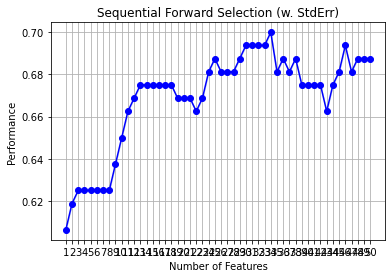

[0, 2, 4, 5, 6, 7, 8, 12, 15, 19, 20, 23, 24, 25, 26, 27, 28, 30, 31, 32, 34, 35, 36, 37, 38, 41, 43, 44, 51, 52, 55, 59, 60, 63]


In [33]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
fig1 = plot_sfs(sfs_Log_Reg.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

feat_cols = list(sfs_Log_Reg.k_feature_idx_)
print(feat_cols)

In [34]:
X_new = sfs_Log_Reg.transform(X)

# Print the results
print('Number of features before transformation: {}'.format(X.shape[1]))
print('Number of features after transformation: {}'.format(X_new.shape[1]))
# print(X_new)
X_new.shape



Number of features before transformation: 64
Number of features after transformation: 34


(200, 34)

# Sequential Backword feature



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    1.7s finished

[2021-01-17 21:52:50] Features: 63/1 -- score: 0.66[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:    2.1s finished

[2021-01-17 21:52:52] Features: 62/1 -- score: 0.655[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  62 out of  62 | elapsed:    1.8s finished

[2021-01-17 21:52:54] Features: 61/1 -- score: 0.67[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remainin

[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    0.9s finished

[2021-01-17 21:53:31] Features: 34/1 -- score: 0.705[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    0.8s finished

[2021-01-17 21:53:32] Features: 33/1 -- score: 0.705[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.8s finished

[2021-01-17 21:53:32] Features: 32/1 -- score: 0.705[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.7s finished

[2021-01-17 21:53:33] Features: 31/1 -- score: 0.705[Parallel(n_jobs=1)]: Usi

Backward Selection - Final set of features selected : ('1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '15', '16', '17', '18', '19', '20', '21', '24', '25', '26', '28', '29', '33', '34', '36', '37', '39', '40', '41', '43', '44', '46', '47', '50', '52', '53', '54', '55', '56', '58', '60', '61', '63')


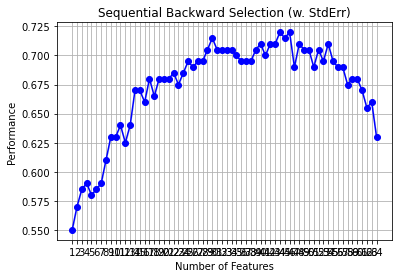

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 24, 25, 26, 28, 29, 33, 34, 36, 37, 39, 40, 41, 43, 44, 46, 47, 50, 52, 53, 54, 55, 56, 58, 60, 61, 63]
Best accuracy score: 0.72
Best subset (indices): (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 24, 25, 26, 28, 29, 33, 34, 36, 37, 39, 40, 41, 43, 44, 46, 47, 50, 52, 53, 54, 55, 56, 58, 60, 61, 63)
Best subset (corresponding names): ('1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '15', '16', '17', '18', '19', '20', '21', '24', '25', '26', '28', '29', '33', '34', '36', '37', '39', '40', '41', '43', '44', '46', '47', '50', '52', '53', '54', '55', '56', '58', '60', '61', '63')


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =0)

# conda install mlxtend --channel conda-forge

lr = LogisticRegression()

#Sequential backward selection(sbs)
sbs_Log_Reg = sfs(estimator=lr, 
           k_features=(1, 50),     #How many features do we want to select out of total features available. This must be less than total features
          forward=False,    #Forward/ backward
          floating=False,
          scoring='accuracy',
          verbose=2,
          cv=0)
sbs_Log_Reg.fit(X, y)

print('Backward Selection - Final set of features selected :', sbs_Log_Reg.k_feature_names_)

fig2 = plot_sfs(sbs_Log_Reg.get_metric_dict(), kind='std_dev')
plt.title('Sequential Backward Selection (w. StdErr)')
plt.grid()
plt.show()

feat_cols_sbs = list(sbs_Log_Reg.k_feature_idx_)
print(feat_cols_sbs)

# Print the results
print('Best accuracy score: %.2f' % sbs_Log_Reg.k_score_)   # k_score_ shows the best score 
print('Best subset (indices):', sbs_Log_Reg.k_feature_idx_) # k_feature_idx_ shows the index of features 
                                                    # that yield the best score
print('Best subset (corresponding names):', sbs_Log_Reg.k_feature_names_) # k_feature_names_ shows the feature names 
                                                                  # that yield the best score


We have used Forward and Backword Selection Algorithm to select the features and then develop the Logistic Regression model on the basis of Accuracy. We have selected top 50 features to cxreate a model.

# Results and Inferences from Sequential Forward Feature Selection 


Features: 50/50 -- score: 0.6875

Feature indexes which are selected as part of SFS:-
[0, 2, 4, 5, 6, 7, 8, 12, 15, 19, 20, 23, 24, 25, 26, 27, 28, 30, 31, 32, 34, 35, 36, 37, 38, 41, 43, 44, 51, 52, 55, 59, 60, 63]

Number of features before transformation: 64
Number of features after transformation: 34
(200, 34)


Best accuracy score after removing unrequired features which is given by Sequential Forward feature : 0.72
Accuracy score before removing any feature we got score by Logistic Regression Model: 0.61875


We have plotted graph between no. of feature and performance of model which gives clear picture that after feature removal performance of the mode is increasing in both cases SFS and SBF


# Results and Inferences from Sequential Backword Feature Selection 

Backward Selection - Final set of features selected : ('1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '15', '16', '17', '18', '19', '20', '21', '24', '25', '26', '28', '29', '33', '34', '36', '37', '39', '40', '41', '43', '44', '46', '47', '50', '52', '53', '54', '55', '56', '58', '60', '61', '63')

Number of features after transformation: 46

Best accuracy score after removing unrequired features which is given by Sequential Backword feature : 0.72
Accuracy score before removing any feature we got score by Logistic Regression Model: 0.60625

